
# Machine Learning Engineer Nanodegree

## Starbucks Capstone Challenge

### Ashish Sharma  
### Feb 01, 2020 

## I. Definition

### Project Overview

#### Domain Background
Marketing is all about getting 4 things <b>right</b> – reaching out to the <b>right</b> customer with the <b>right</b> product at the <b>right</b> time through the right channel. While the change in information consumption has resulted in digital marketing taking over the traditional marketing, Data Science has revolutionized and reshaped the digital advertisement business to meet those objectives.

<img src="digital trend.png" style="width: 500px;"/>

The use cases range from capitalizing on unexpected insights, boosting contextual relevance to generate response from target audience, defining optimum pricing based on demographics, enhancing ads creativity based on various segments to generate response, and much more..

#### Introduction
I chose the data provided by Starbuck for this final capstone project.
This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

The task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. 
This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

#### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

#### Cleaning

This makes data cleaning especially important and tricky.

I also have to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

#### Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

### Problem Statement
In this project we will explore the data provided by Starbucks as explain above. 

The goal in this project is to build a model that predicts whether someone will respond to an offer or not. This should help in defining which offer should be sent to a certain customer triggering more revenue. Also, various demographics groups and offer type relation might be identified. 

Below are the tasks that will be executed to achieve the objectives:
* Data Exploration and Analysis.
* Data pre-processing, Feature engineering and selection.
* Data preperation for Machine Learning
* Model Training
* Fine Tuning 
* Solution

### Metrics
Reference : https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Precision and recall are just different metrics for measuring the "success" or performance of a trained model.

Precision, also called as accuracy of positive predictions, is defined as the number of true positives over all positives, and will be the higher when the amount of false positives is low.

Recall, also called sensitivity or True positive rate,  is defined as the number of true positives over true positives plus false negatives and will be higher when the number of false negatives is low.

Both take into account true positives and will be higher for high, positive accuracy, too.

<img src="precision-recall.png" style="width: 400px;"/>

It is often convenient to combine precision and recall into a single metric called
the F1 score, in particular if you need a simple way to compare two classifiers.
The F score is the harmonic mean of precision and recall whereas the regular mean treats all values equally, the harmonic mean givesmuch more weight to low values. As a result, the classifier will only get a high
F1 score if both recall and precision are high.


## II. Analysis

### Data Exploration
### Exploratory Visualization
Reference: https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/

In [1]:
#General Packages
import math
import json
import os
import datetime

#Import PyData packages
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn Packages
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import boto3
import sagemaker

In [2]:
# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

print("portfolio Columns : ", portfolio.columns.tolist())
print("profile Columns : ", profile.columns.tolist())
print("transcript Columns : ", transcript.columns.tolist())

portfolio Columns :  ['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward']
profile Columns :  ['age', 'became_member_on', 'gender', 'id', 'income']
transcript Columns :  ['event', 'person', 'time', 'value']


In [3]:
#Renames the column to remove disambiguation and making column more descriptive.
portfolio.rename(columns={"id": "offer_id"}, inplace = True) 
portfolio.head(10)

,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
#Renames the column to remove disambiguation.
profile.rename(columns={"id": "customer_id"}, inplace = True) 
profile.head(10)

,age,became_member_on,gender,customer_id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [5]:
#Inspect portfolio dataset
print(portfolio.shape)
portfolio.info()
portfolio.head(10)

(10, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
offer_id      10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [6]:
#Check count of various offer_type
portfolio["offer_type"].value_counts() 

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

In [7]:
portfolio["difficulty"].value_counts() 

10    4
5     2
0     2
7     1
20    1
Name: difficulty, dtype: int64

In [8]:
portfolio["duration"].value_counts() 

7     4
10    2
5     2
4     1
3     1
Name: duration, dtype: int64

In [9]:
# Checking how many null values exists for each attribute
portfolio.isnull().sum() # -- There are no rows to be removed

channels      0
difficulty    0
duration      0
offer_id      0
offer_type    0
reward        0
dtype: int64

In [10]:
#Inspect profile dataset
print(profile.shape)
profile.info()
profile.head()

(17000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
customer_id         17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


,age,became_member_on,gender,customer_id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [11]:
# Check how many null values exists for each attribute
profile.isnull().sum() 

age                    0
became_member_on       0
gender              2175
customer_id            0
income              2175
dtype: int64

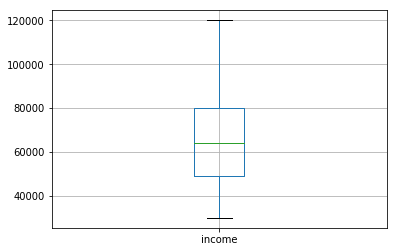

In [12]:
profile.boxplot(column=['income'], grid=True)

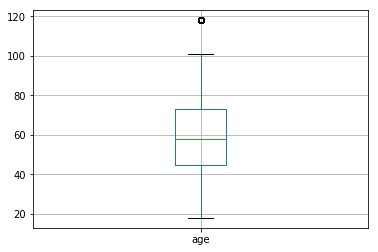

In [13]:
profile.boxplot(column=['age'], grid=True)

It seems we have an outlier for age closer to 120 value. On a deeper looker it seems outlier exists at age=118

In [14]:
# It seems there are 2175 rows having missing values for age and gender 
# { age : 118, gender : None , income = 'NaN'}. 
# Moreover, age =118 , although possible but does not seems right for a coffee drinker.
len(profile[(profile.age == 118) & (profile.gender.isnull()) & (profile.income.isnull())])

2175

In [15]:
# Dropping all columns whose all values are missing.
# profile.dropna(axis = 'rows', how='any', inplace=True) 
condition = profile[(profile.age == 118) & (profile.gender.isnull()) & (profile.income.isnull())]
profile.drop(condition.index, inplace=True)
profile.shape

(14825, 5)

In [16]:
profile.isnull().sum()
profile.head()

,age,became_member_on,gender,customer_id,income
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0


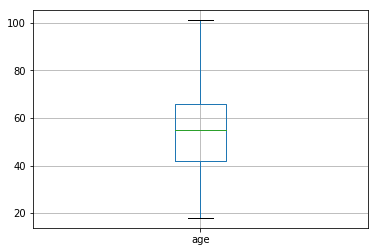

In [17]:
#Lets plot again to see if outlier has been removed.
profile.boxplot(column=['age'], grid=True)

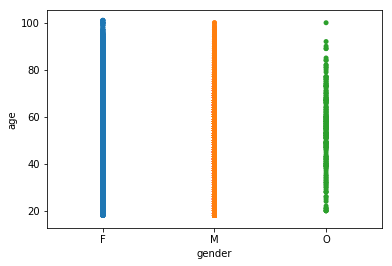

In [18]:
#Visualizing the gender distribution in a seaborn count plot
sns.stripplot(x="gender", y="age", data=profile)
# The plot below shows quite even distribution agewise for each gender.

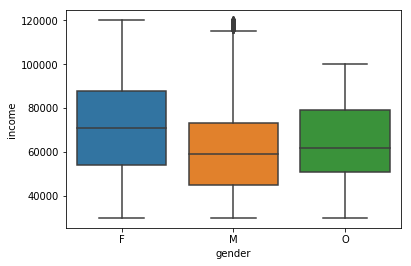

In [19]:
sns.boxplot(x="gender", y="income", data=profile)
#The plot below for male and others mean income is much less than female.
#This meant, female starbucks customers have more higher income than males, others.


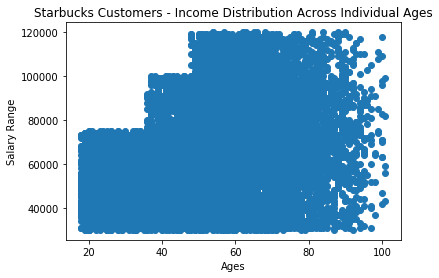

In [20]:
#Visualizing the data in a scatter plot using individual ages instead of age ranges
plt.scatter(data = profile, x = 'age', y = 'income')
plt.title('Starbucks Customers - Income Distribution Across Individual Ages');
plt.xlabel('Ages');
plt.ylabel('Salary Range');
plt.style.use('seaborn');

In [21]:
#Inspect transcript dataset
print(transcript.shape)
transcript.info()
transcript.head()

(306534, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [22]:
#Check count of various event
transcript["event"].value_counts(normalize=True) 

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [23]:
# Checking how many null values exists for each attribute
transcript.isnull().sum() 

event     0
person    0
time      0
value     0
dtype: int64

In [24]:
#Change 'time' column to 'days' along with the appropriate values
transcript['days'] = transcript['time'] / 24
transcript.drop(columns = ['time'], inplace = True)
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
value     306534 non-null object
days      306534 non-null float64
dtypes: float64(1), object(3)
memory usage: 9.4+ MB


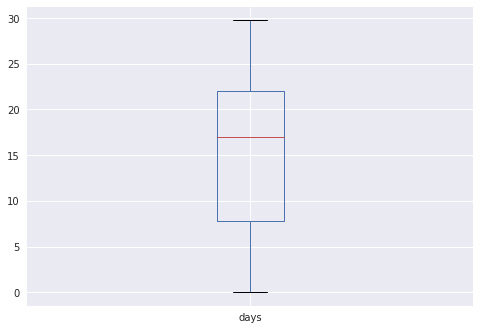

In [25]:
transcript.boxplot()

### Algorithms and Techniques

For the benchmark, purpose I will be using very simple sklearn.svm.SVC (Support Vector Classification) with default parameters.
For the relatively small dataset, this algorithm is well suited for classification tasks.
A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.

For the main model, I will experiment with "LinearLinear " and "Feed Forward Neural Network with 1 hidden layer".

With LinearLinear you can simultaneously explore different training objectives and choose the best solution from a validation set. In our case, I can optimize model for F1 measure, precision, recall, or accuracy.

The implementation requires below 3 steps:
* Preprocess : Normalization, or feature scaling, is an important preprocessing step for certain loss functions that ensures the model being trained on a dataset does not become dominated by the weight of a single feature. The Amazon SageMaker Linear Learner algorithm has a normalization option to assist with this preprocessing step. If normalization is turned on, the algorithm first goes over a small sample of the data to learn the mean value and standard deviation for each feature and for the label. Each of the features in the full dataset is then shifted to have mean of zero and scaled to have a unit standard deviation. Only the features can be normalized for binary classification and this is the default behavior.

<b> I will be performing this pre-processing step seperating and will not be using normalization feature of the model, so that I can keep the input consistent across model for measuring performances between them. </b>

* Train : With the linear learner algorithm, you train with a distributed implementation of stochastic gradient descent (SGD). You can control the optimization process by choosing the optimization algorithm. For example, you can choose to use Adam, AdaGrad, stochastic gradient descent, or other optimization algorithms. You also specify their hyperparameters, such as momentum, learning rate, and the learning rate schedule. If you aren't sure which algorithm or hyperparameter value to use, choose a default that works for the majority of datasets.

<b> I will be using SGD as an optimizer due to relatively small data set as it converges better, however takes longer training time </b>
<b> Also I will use binary_classifier_model_selection_criteria='recall_at_target_precision', to gethighest recall at a given precision target, with target_precision of 90% </b>

* Validate : For classification, a sample of the validation set is used to calibrate the classification threshold. The most optimal model selected is the one that achieves the best binary classification selection criteria on the validation set. Examples of such criteria include the F1 measure, accuracy, and cross-entropy loss.

With "Feed Forward Neural Network" the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output notes, with no cycles or loops in the network.

<img src="feed_forward_neural_net.gif" style="width: 500px;"/>

I will be using 1 hidden layer with hidden dimension will be calculated based on input feature set as below :

Reference : https://www.heatonresearch.com/2017/06/01/hidden-layers.html
 
* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

I will be setting dropout to 0.3 for regularization and preventing the co-adaptation of neurons.
Reference : https://arxiv.org/abs/1207.0580

Since we need binary classification (0 or 1), we will be using sigmoid function for the output layer.
Reference: https://medium.com/analytics-vidhya/sigmoid-function-with-pytorch-99cb2209ad89

For training and optmization, we will be using Adam optmizer as it ombines the best properties of RMSProp and AdaGrad to work well even with noisy or sparse datasets
Reference : https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

and Since we have a sigmoid function as output, we will use BCELoss as loss function
Reference : https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c
https://medium.com/analytics-vidhya/simple-neural-network-with-bceloss-for-binary-classification-for-a-custom-dataset-8d5c69ffffee

<b> Data will be cleansed, pre-processing, feature engineered and normalized before feeding into vairous model described above. </b>

### Benchmark

In this project, I will aim for <b>higher precision</b> (lower False positives) vs recall (lower false negatives) alongwith higher F1 score, as it is ok to send offer which is less relevant to the customer rather than not sending at all

    * True positive  = offer used and model classifies them correctly
    * False positive = offer not used , however model classifies them incorrectly (offer used)
    * False negative = offer used , however model classifies them incorrectly (offer not used)
    * True negative  = offer not used and model classifies them correctly

<img src="confusion_matrix.jpg" style="width: 400px;"/>

<b> Since we do not have any past data/result, I will baseline my metric based on benchmark model - SVC and then
    will select LinearLeaner or Feed forward nueral network, based on how they perform against the benchmark metric - higher precision </b>

# III. Methodology

### Data Preprocessing
Reference :
* https://elitedatascience.com/wp-content/uploads/2018/05/Feature-Engineering-Checklist.pdf
* https://towardsdatascience.com/why-automated-feature-engineering-will-change-the-way-you-do-machine-learning-5c15bf188b96

Kindly refer code comments for pre-processing steps below:

In [26]:
#This helper function extracts attribute value from a column containing json string.
def json_attr_extract(x, attr):
    x  = str(x).replace("'", '"') # This is required, as json expects double quotes
    x  = x.replace('offer id', 'offer_id') # Replacing offer id with offer_id 
    x  = json.loads(x)
    if attr in x:
        val = x[attr]  
    else:
        val = None # for some of records, reward attribute does not exists
    return val

In [27]:
#Create seperate transaction dataframe based on event 
transcript_transaction = transcript[transcript.event == 'transaction'].copy()
#transcript_offer = transcript[transcript.event != 'transaction']
transcript_transaction['amount'] = transcript.value.apply(json_attr_extract, attr ='amount')
transcript_transaction.drop(columns =["value"], axis=1, inplace = True)
transcript_transaction.head()

,event,person,days,amount
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56
12659,transaction,54890f68699049c2a04d415abc25e717,0.0,13.23
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97


In [28]:
# Creating new data set from transaction to extract frequency of transactions at person level.
# This could be interesting feature which shows how much customer is interested.
# This will help to identify everyday user vs irregular user
purchase_frequency = transcript_transaction.groupby(["person"]).count()
purchase_frequency.rename(columns = {'days' : 'purchase_frequency' }, inplace = True)
purchase_frequency.drop(columns =["amount", "event"], axis=1, inplace = True)
purchase_frequency.head()

,purchase_frequency
person,
0009655768c64bdeb2e877511632db8f,8
00116118485d4dfda04fdbaba9a87b5c,3
0011e0d4e6b944f998e987f904e8c1e5,5
0020c2b971eb4e9188eac86d93036a77,8
0020ccbbb6d84e358d3414a3ff76cffd,12


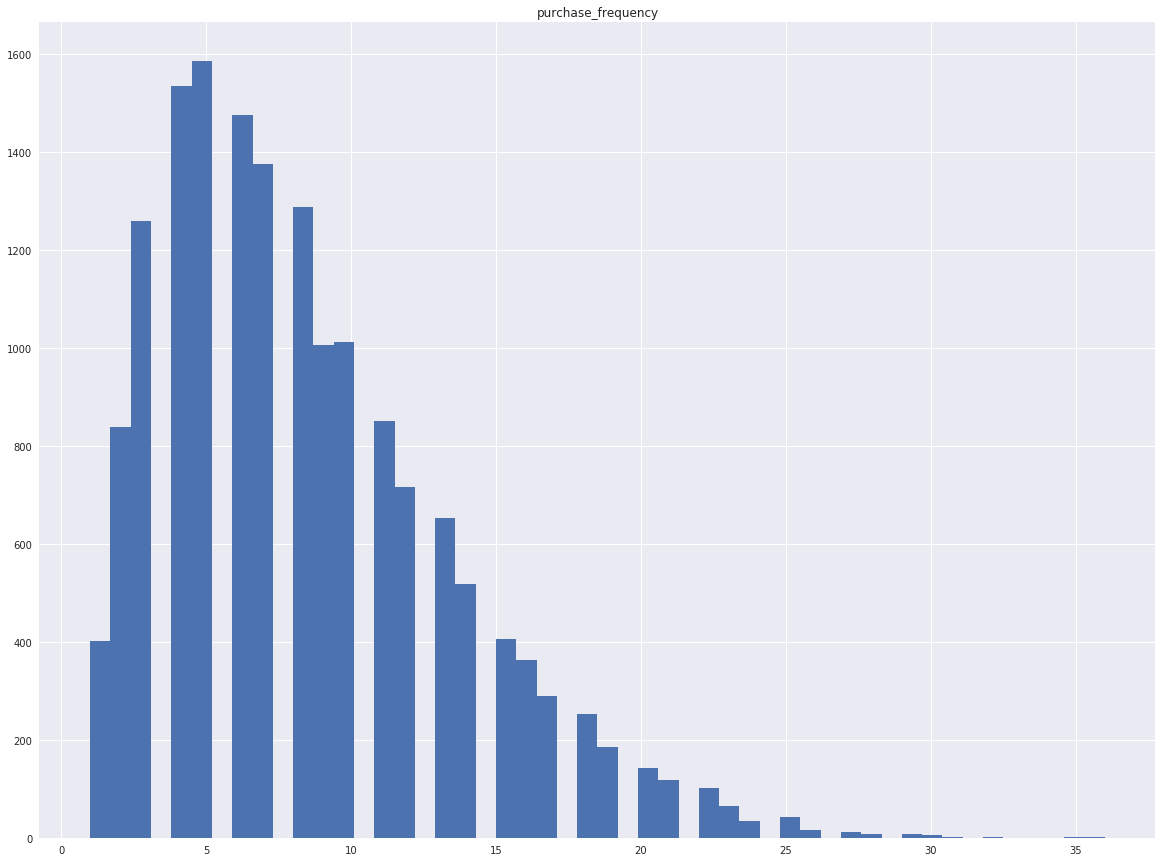

In [29]:
purchase_frequency.hist(bins=50, figsize=(20,15))
plt.show()

In [30]:
purchase_frequency.describe()
purchase_frequency.shape

(16578, 1)

In [31]:
#Separating and one hot encoding the channels field
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

#Initializing our MultiLabelBinarizer object
channels_one_hot = MultiLabelBinarizer()
#One hot encoding the data
sep_channels = channels_one_hot.fit_transform(portfolio['channels'])
#Building a DataFrame around these channels
channels_df = pd.DataFrame(data = sep_channels, columns = channels_one_hot.classes_)
#Concatenating the new columns to our primary 'portfolio' DataFrame
portfolio = pd.concat([portfolio, channels_df], axis = 1)
#Changing the column names to affix 'channels_' prefix
portfolio.rename(columns = {'email': 'channel_email', 'mobile': 'channel_mobile', 'social': 'channel_social', 'web': 'channel_web'}, inplace = True)
#Viewing our changes
portfolio.head()

,channels,difficulty,duration,offer_id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


In [32]:
# Define new features based on value column in transcript data set
transcript['offer_id'] = transcript.value.apply(json_attr_extract, attr ='offer_id')
#transcript['reward'] = transcript.value.apply(json_attr_extract, attr ='reward')
transcript['amount'] = transcript.value.apply(json_attr_extract,attr ='amount')

In [33]:
# No longer require value column
transcript.drop(columns =["value"], axis=1, inplace = True)
transcript.drop(columns =["days"], axis=1, inplace = True)

In [34]:
#Inspect transcript dataset
print(transcript.shape)
transcript.info()
transcript.head()

(306534, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event       306534 non-null object
person      306534 non-null object
offer_id    167581 non-null object
amount      138953 non-null float64
dtypes: float64(1), object(3)
memory usage: 9.4+ MB


,event,person,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [35]:
#Changing 'became_member_on' column to a date type
profile['became_member_on'] = profile['became_member_on'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d').date())
profile['became_member_on'].describe()

count          14825
unique          1707
top       2017-08-19
freq              39
Name: became_member_on, dtype: object

In [36]:
#Using one hot encoding to convert gender, and offer_type
from sklearn.preprocessing import OneHotEncoder
gender_encoder = OneHotEncoder()

# This is important as we removed some rows earlier from dataset,few indexes will be missing
#This will ensure , when we concat we do not run into index mismatch issue causing NaN rows
profile.reset_index(drop=True, inplace= True) 

gender_sep = gender_encoder.fit_transform(profile[['gender']])
column_names = [ x.replace('x0_', 'gender_') for x  in gender_encoder.get_feature_names()]
#Building a DataFrame around these genders
gender_df = pd.DataFrame(data = gender_sep.toarray(), columns = column_names)

profile = pd.concat([profile, gender_df], axis = 1)
#profile.concat(gender_df, axis = 1, inplace = True)

#Validate profile data after gender hot-1-encoding
print(len(profile[(profile.gender == 'F') & ( (profile.gender_O == 1.0) | (profile.gender_M == 1.0))]))
print(len(profile[(profile.gender == 'M') & ( (profile.gender_O == 1.0) | (profile.gender_F == 1.0))]))
print(len(profile[(profile.gender == 'O') & ( (profile.gender_M == 1.0) | (profile.gender_F == 1.0))]))

#Dropping original column
profile.drop(columns = ['gender'], inplace = True)
profile.head()

0
0
0


,age,became_member_on,customer_id,income,gender_F,gender_M,gender_O
0,55,2017-07-15,0610b486422d4921ae7d2bf64640c50b,112000.0,1.0,0.0,0.0
1,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1.0,0.0,0.0
2,68,2018-04-26,e2127556f4f64592b11af22de27a7932,70000.0,0.0,1.0,0.0
3,65,2018-02-09,389bc3fa690240e798340f5a15918d5c,53000.0,0.0,1.0,0.0
4,58,2017-11-11,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,0.0,1.0,0.0


In [37]:
#Calculating number of days as a member ending on 2017-01-01 in new column 'member_days'
#Reference : https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

# End date is defined with assumption that new data will always have become_member_on > 2017-01-01
end_date = pd.Timestamp('2017-01-01')
end_date = pd.to_datetime(end_date)
profile['member_days'] = np.abs((pd.to_datetime(profile['became_member_on']) - end_date).dt.days)

#Inspect
profile.head(10)

,age,became_member_on,customer_id,income,gender_F,gender_M,gender_O,member_days
0,55,2017-07-15,0610b486422d4921ae7d2bf64640c50b,112000.0,1.0,0.0,0.0,195
1,75,2017-05-09,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1.0,0.0,0.0,128
2,68,2018-04-26,e2127556f4f64592b11af22de27a7932,70000.0,0.0,1.0,0.0,480
3,65,2018-02-09,389bc3fa690240e798340f5a15918d5c,53000.0,0.0,1.0,0.0,404
4,58,2017-11-11,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,0.0,1.0,0.0,314
5,61,2017-09-11,aa4862eba776480b8bb9c68455b8c2e1,57000.0,1.0,0.0,0.0,253
6,26,2014-02-13,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0,0.0,1.0,0.0,1053
7,62,2016-02-11,31dda685af34476cad5bc968bdb01c53,71000.0,1.0,0.0,0.0,325
8,49,2014-11-13,62cf5e10845442329191fc246e7bcea3,52000.0,0.0,1.0,0.0,780
9,57,2017-12-31,6445de3b47274c759400cd68131d91b4,42000.0,0.0,1.0,0.0,364


In [38]:
#Using one hot encoding to convert gender, and offer_type - as there are categorized as nominal features
from sklearn.preprocessing import OneHotEncoder
offer_encoder = OneHotEncoder()

# This is important as we removed some rows earlier from dataset,few indexes will be missing
#This will ensure , when we concat we do not run into index mismatch issue causing NaN rows
portfolio.reset_index(drop = True, inplace= True) 

offer_sep = offer_encoder.fit_transform(portfolio[['offer_type']])
column_names = [ x.replace('x0_', 'offer_type_') for x  in offer_encoder.get_feature_names()]
#Building a DataFrame around these genders
offer_df = pd.DataFrame(data = offer_sep.toarray(), columns = column_names)

portfolio = pd.concat([portfolio, offer_df], axis = 1)


#Validate profile data after offer_type hot-1-encoding
print(len(portfolio[(portfolio.offer_type == 'informational') & ( (portfolio.offer_type_discount == 1.0) | (portfolio.offer_type_bogo == 1.0))]))
print(len(portfolio[(portfolio.offer_type == 'bogo') & ( (portfolio.offer_type_discount == 1.0) | (portfolio.offer_type_informational == 1.0))]))
print(len(portfolio[(portfolio.offer_type == 'discount') & ( (portfolio.offer_type_informational == 1.0) | (portfolio.offer_type_bogo == 1.0))]))

#Dropping original column
portfolio.drop(columns = ['offer_type'], inplace = True)
portfolio.head()

0
0
0


,channels,difficulty,duration,offer_id,reward,channel_email,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,offer_type_informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1.0,0.0,0.0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1.0,0.0,0.0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0.0,0.0,1.0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1.0,0.0,0.0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0.0,1.0,0.0


In [39]:
#This function returns where the person viewed a specific offer by checking in specific data set
def is_offer_viewed(person_id, offer_id, offers_df):
    offers_df = offers_df[(offers_df['person'] == person_id) & (offers_df['offer_id'] == offer_id)]
    return int(not offers_df.empty)

In [40]:
transcript["event"].value_counts()
#Create seperate data set for completed offers
completed_offers = transcript[transcript.event == 'offer completed'].copy()
#Create seperate data set for viewed offers
viewed_offers = transcript[transcript.event == 'offer viewed'].copy()
#Create new feature "offer_used", which defines whether customer has completed the offers and have viewed the offer as well
# In other words, he was influenced by the offer. This is the data we are interested in.
completed_offers["offer_used"] = completed_offers.apply(lambda row : is_offer_viewed(row['person'],row['offer_id'], viewed_offers), axis=1)

In [41]:
#Inspect completed_offers dataset
print(completed_offers.shape)
completed_offers.info()
completed_offers.head()

(33579, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33579 entries, 12658 to 306527
Data columns (total 5 columns):
event         33579 non-null object
person        33579 non-null object
offer_id      33579 non-null object
amount        0 non-null float64
offer_used    33579 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


,event,person,offer_id,amount,offer_used
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,NaN,1
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,NaN,1
12679,offer completed,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1
12692,offer completed,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,NaN,1
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1


In [42]:
# Time to create Final Data set...
# Join completed_offers with profile data set. Using inner join as there are persons in completed_offers that does not exists 
# in profile data set and vice versa.
result = completed_offers.merge(profile, how="inner", left_on="person" , right_on ="customer_id" )
#Join resultant set with portfolio data set.
offers_completed_final = result.merge(portfolio, how="inner", left_on="offer_id", right_on = "offer_id")

In [43]:
#Shape check --Before
offers_completed_final.shape
#Using left join, as some transactions might be missing for person, we may have to impute some values here.
final_dataset = offers_completed_final.merge(purchase_frequency, how="left", left_on="person", right_on = "person")
#Shape check --After
final_dataset.shape

(32444, 25)

In [44]:
#Dropping not required columns 
#offer_type_informational is not useful as there will not be any transaction - completed offers for the same.
final_dataset.drop(columns =["event", "channels", "amount", "person","became_member_on","customer_id", "offer_id", "offer_type_informational" ], axis=1, inplace = True)

In [45]:
final_dataset["channel_email"].value_counts()
#It seems channel_email does not provide any constant value as 1 , and thus can be omitted without any loss of meaning.
#Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
final_dataset.drop(columns =["channel_email"], axis=1, inplace = True)

In [46]:
# Since same person can buy same offers over multiple periods, we need to remove duplicate rows from final set.
# Note : These duplicate rows will same all attributes as same value
final_dataset.drop_duplicates(inplace = True)

In [47]:
#Inspect final data set.
print(len(final_dataset.columns),final_dataset.columns )
print(final_dataset.shape)
final_dataset.info()

16 Index(['offer_used', 'age', 'income', 'gender_F', 'gender_M', 'gender_O',
       'member_days', 'difficulty', 'duration', 'reward', 'channel_mobile',
       'channel_social', 'channel_web', 'offer_type_bogo',
       'offer_type_discount', 'purchase_frequency'],
      dtype='object')
(27941, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27941 entries, 0 to 32443
Data columns (total 16 columns):
offer_used             27941 non-null int64
age                    27941 non-null int64
income                 27941 non-null float64
gender_F               27941 non-null float64
gender_M               27941 non-null float64
gender_O               27941 non-null float64
member_days            27941 non-null int64
difficulty             27941 non-null int64
duration               27941 non-null int64
reward                 27941 non-null int64
channel_mobile         27941 non-null int64
channel_social         27941 non-null int64
channel_web            27941 non-null int64
offer_type_b

In [48]:
final_dataset.isnull().sum()

offer_used             0
age                    0
income                 0
gender_F               0
gender_M               0
gender_O               0
member_days            0
difficulty             0
duration               0
reward                 0
channel_mobile         0
channel_social         0
channel_web            0
offer_type_bogo        0
offer_type_discount    0
purchase_frequency     0
dtype: int64

In [49]:
final_dataset.head()

,offer_used,age,income,gender_F,gender_M,gender_O,member_days,difficulty,duration,reward,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,purchase_frequency
0,1,42,96000.0,0.0,1.0,0.0,350,10,7,2,1,0,1,0.0,1.0,12
1,1,52,72000.0,0.0,1.0,0.0,520,10,7,2,1,0,1,0.0,1.0,3
2,1,67,67000.0,1.0,0.0,0.0,460,10,7,2,1,0,1,0.0,1.0,8
3,0,54,39000.0,0.0,1.0,0.0,507,10,7,2,1,0,1,0.0,1.0,18
4,0,64,83000.0,1.0,0.0,0.0,8,10,7,2,1,0,1,0.0,1.0,4


In [50]:
final_dataset.describe()

,offer_used,age,income,gender_F,gender_M,gender_O,member_days,difficulty,duration,reward,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,purchase_frequency
count,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000,27941.000000
mean,0.841022,55.780824,69328.549443,0.474500,0.510146,0.015354,327.683619,9.319423,7.312050,4.958054,0.894671,0.643785,0.887406,0.472424,0.527576,9.779714
std,0.365662,16.831182,21602.962094,0.499358,0.499906,0.122958,229.680132,4.224321,1.771748,2.903684,0.306982,0.478888,0.316102,0.499248,0.499248,5.045417
min,0.000000,18.000000,30000.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,45.000000,53000.000000,0.000000,0.000000,0.000000,174.000000,5.000000,7.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000
50%,1.000000,57.000000,68000.000000,0.000000,1.000000,0.000000,298.000000,10.000000,7.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000
75%,1.000000,67.000000,85000.000000,1.000000,1.000000,0.000000,430.000000,10.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000
max,1.000000,101.000000,120000.000000,1.000000,1.000000,1.000000,1252.000000,20.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000


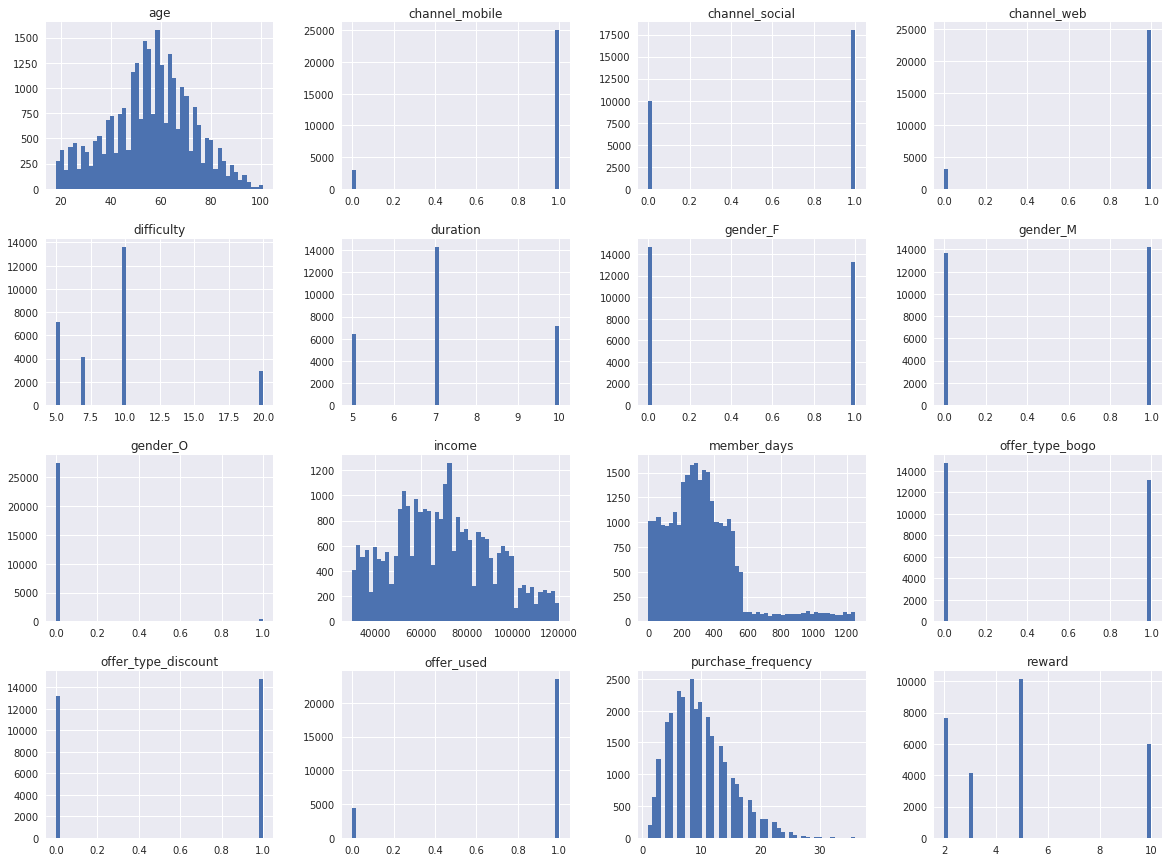

In [51]:
final_dataset.hist(bins=50, figsize=(20,15))
plt.show()

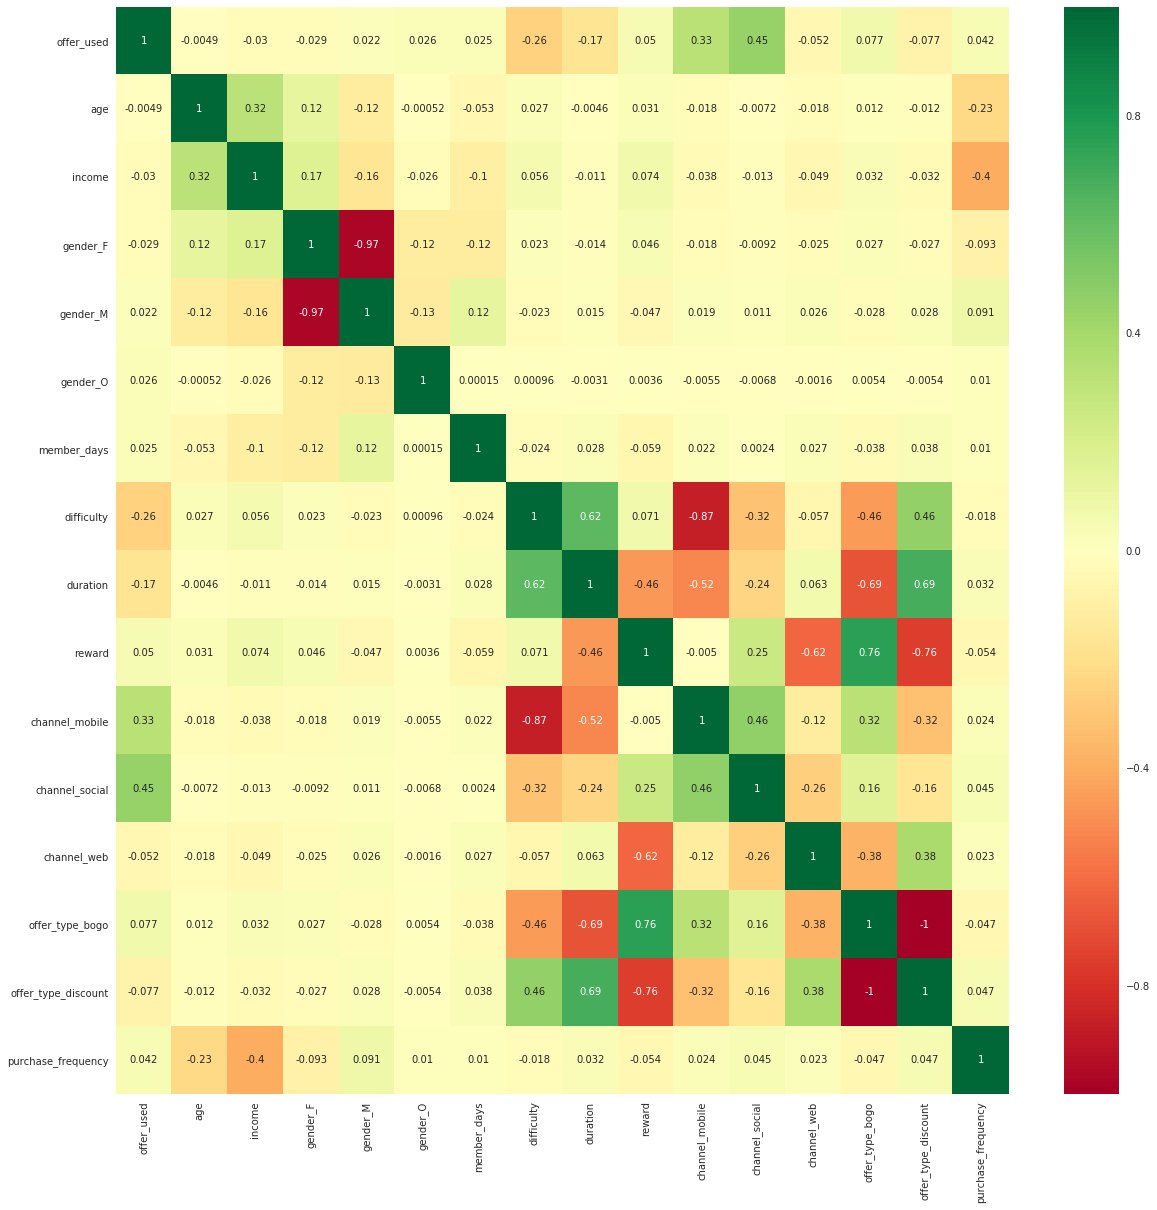

In [52]:
#Reference : https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#Correlation Matrix with Heatmap
start_index = 1
end_index = len(final_dataset.columns)
X = final_dataset.iloc[:,start_index:end_index]  #independent columns
y = final_dataset.iloc[:,0]   #target column
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs          Score
1                income  173558.339953
6            difficulty    3515.446089
5           member_days    2812.098162
10       channel_social    1988.148881
7              duration     348.828630
9        channel_mobile     313.192101
14   purchase_frequency     129.420541
8                reward     119.005557
12      offer_type_bogo      88.184591
13  offer_type_discount      78.965918


In [54]:
# Hmm something is not right, the output of above two set does not match.
#SelectKBest is showing income as best feature but we did not find any correlation via Correlation Matrix.
# Similar behaviour is observed for difficulty, members days etc.
#This is due to  different scales for these feature set.
#Hence , we need to apply feature scaling

In [55]:
#Scaling the data
#https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
#Using MinMaxScalar so that it has zero effects on 1-hot encoded features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(final_dataset)

#Rebuilding the DataFrame
column_names = final_dataset.columns.values.tolist()
final_dataset_scaled = pd.DataFrame(scaled_dataset, columns = column_names)
final_dataset_scaled.head()

,offer_used,age,income,gender_F,gender_M,gender_O,member_days,difficulty,duration,reward,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,purchase_frequency
0,1.0,0.289157,0.733333,0.0,1.0,0.0,0.279553,0.333333,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.314286
1,1.0,0.409639,0.466667,0.0,1.0,0.0,0.415335,0.333333,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.057143
2,1.0,0.590361,0.411111,1.0,0.0,0.0,0.367412,0.333333,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.200000
3,0.0,0.433735,0.100000,0.0,1.0,0.0,0.404952,0.333333,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.485714
4,0.0,0.554217,0.588889,1.0,0.0,0.0,0.006390,0.333333,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.085714


In [56]:
#Validate - Reversal
inverse_dataset =  scaler.inverse_transform(scaled_dataset)
inversed_df = pd.DataFrame(inverse_dataset, columns = column_names)
inversed_df.head()

,offer_used,age,income,gender_F,gender_M,gender_O,member_days,difficulty,duration,reward,channel_mobile,channel_social,channel_web,offer_type_bogo,offer_type_discount,purchase_frequency
0,1.0,42.0,96000.0,0.0,1.0,0.0,350.0,10.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,12.0
1,1.0,52.0,72000.0,0.0,1.0,0.0,520.0,10.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0
2,1.0,67.0,67000.0,1.0,0.0,0.0,460.0,10.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,8.0
3,0.0,54.0,39000.0,0.0,1.0,0.0,507.0,10.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,18.0
4,0.0,64.0,83000.0,1.0,0.0,0.0,8.0,10.0,7.0,2.0,1.0,0.0,1.0,0.0,1.0,4.0


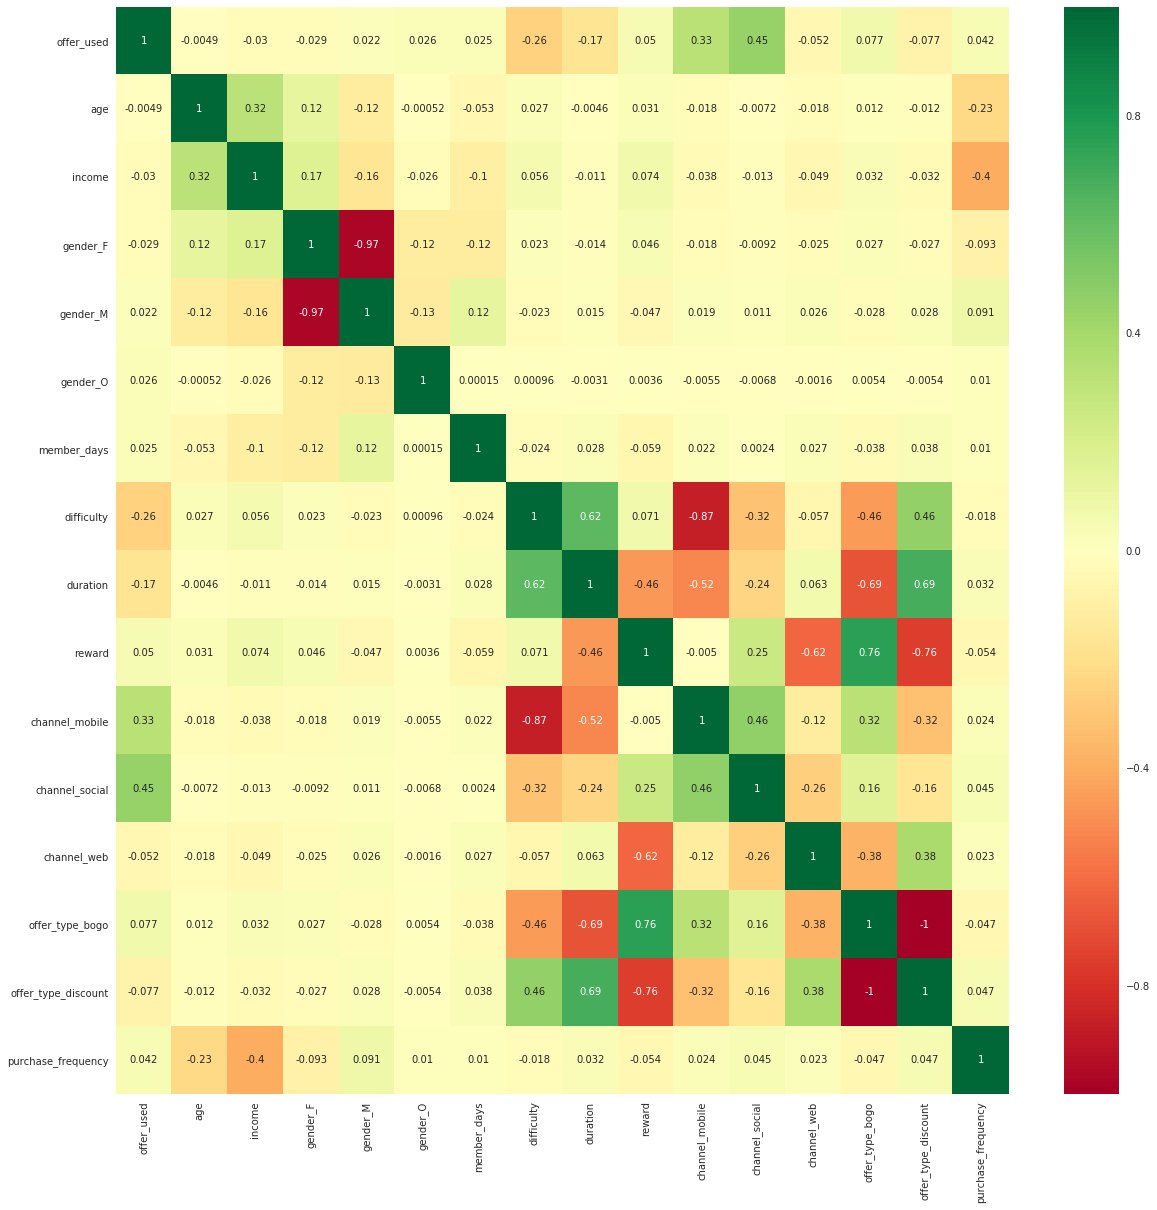

In [57]:
#Reference : https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#Correlation Matrix with Heatmap
start_index = 1
end_index = len(final_dataset_scaled.columns)
X = final_dataset_scaled.iloc[:,start_index:end_index]  #independent columns
y = final_dataset_scaled.iloc[:,0]   #target column
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs        Score
10       channel_social  1988.148881
6            difficulty   505.652859
9        channel_mobile   313.192101
7              duration   220.639872
12      offer_type_bogo    88.184591
13  offer_type_discount    78.965918
8                reward    24.933450
4              gender_O    18.078016
2              gender_F    12.069760
11          channel_web     8.427039


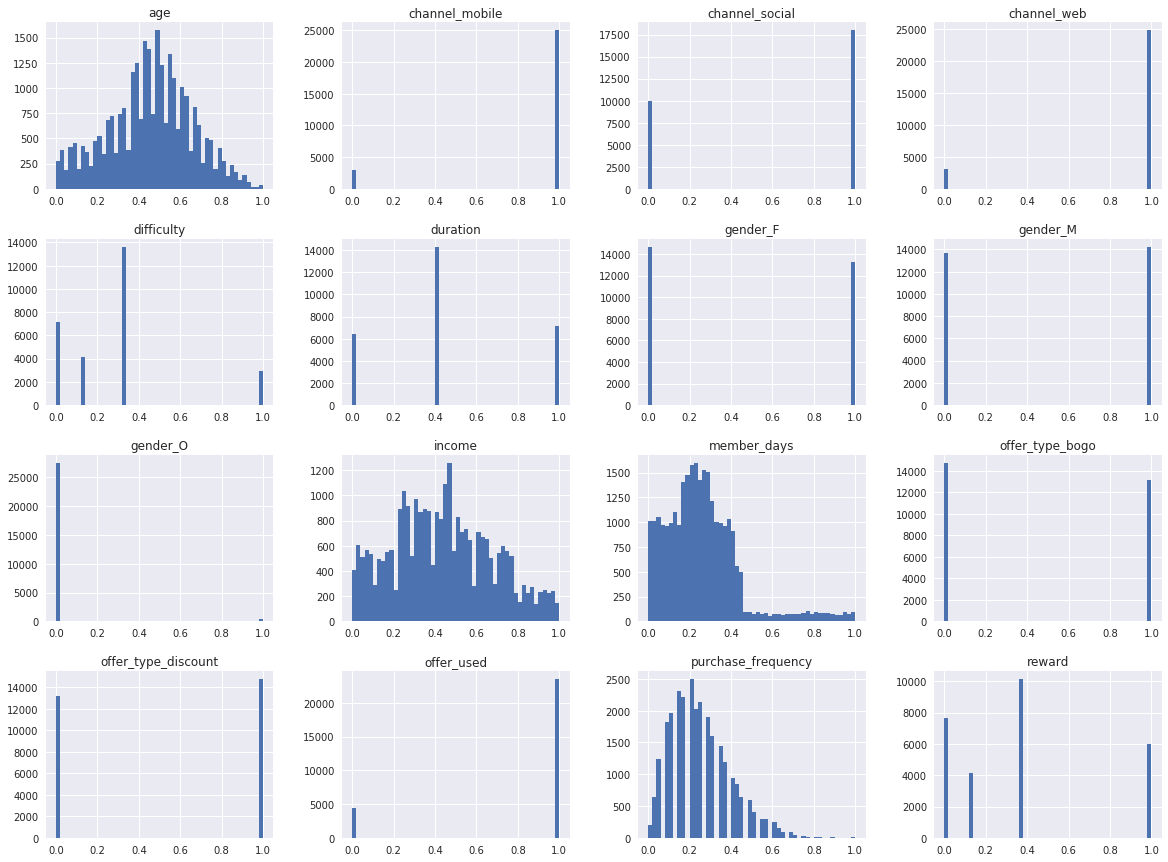

In [59]:
final_dataset_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [60]:
# Split data into labels and features
valid_offers_used = final_dataset_scaled['offer_used'].copy()
#It was identified age does not have much correlation with offer_used
#valid_offers_features = final_dataset_scaled.drop(['offer_used'], axis=1)
valid_offers_features = final_dataset_scaled.drop(['offer_used', 'age'], axis=1)
#valid_offers_features = final_dataset_scaled.drop(['offer_used','age', 'purchase_frequency'], axis=1)


In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(valid_offers_features, 
                                                    valid_offers_used, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [62]:
#Validate 80/20 split based on offer used in train and test set.
print("20% of Offer_used = 0 : ", int(final_dataset_scaled.offer_used.value_counts()[0]*.20) )
print( "Count of Offer used=0 in test set : ", y_test.value_counts()[0])

20% of Offer_used = 0 :  888
Count of Offer used=0 in test set :  900


In [63]:
y_train.value_counts(normalize=True)

1.0    0.841535
0.0    0.158465
Name: offer_used, dtype: float64

In [64]:
y_test.value_counts(normalize=True)

1.0    0.838969
0.0    0.161031
Name: offer_used, dtype: float64

In [65]:
#Upload Data to S3
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [66]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    # combine labels and features 
    pd.concat([y, x], axis=1)\
        .to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    # indicate function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [67]:
data_dir = 'starbucks_capstone_data' # the folder we will use for storing data in notebook
name = 'train.csv'

# create 'train.csv'
make_csv(X_train, y_train, name, data_dir)

Path created: starbucks_capstone_data/train.csv


In [68]:
# prefix: description name for directory in S3
prefix = 'starbucks-capstone/offer-data'

# upload all data to S3
uploaded_data_s3 = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
print(uploaded_data_s3)

s3://sagemaker-us-east-1-755811553671/starbucks-capstone/offer-data


In [69]:
# confirm that data is in S3 bucket
empty_check = []
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    empty_check.append(obj.key)
    print(obj.key)

assert len(empty_check) !=0, 'S3 bucket is empty.'
print('Test passed!')

pytorch-training-2020-03-17-23-51-43-608/source/sourcedir.tar.gz
pytorch-training-2020-03-18-01-11-58-026/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-12-22-51-57-034/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-12-22-56-39-650/sourcedir.tar.gz
sagemaker-pytorch-2020-03-12-23-43-44-272/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-12-23-48-27-357/sourcedir.tar.gz
sagemaker-pytorch-2020-03-12-23-51-58-595/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-13-00-02-31-894/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-13-00-12-14-586/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-13-00-22-30-980/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-13-00-32-02-350/sourcedir.tar.gz
sagemaker-pytorch-2020-03-16-23-37-24-421/source/sourcedir.tar.gz
sagemaker-pytorch-2020-03-16-23-47-41-276/sourcedir.tar.gz
sagemaker-pytorch-2020-03-17-23-59-58-298/sourcedir.tar.gz
sagemaker-pytorch-2020-03-18-01-20-12-705/sourcedir.tar.gz
sagemaker-record-sets/LinearLearner-2020-03-18-00-12-5

### Implementation

#### Define and Train Models
#### BenchMark Model - SVC

In [70]:
!pygmentize source_sklearn/train.py

  
from __future__ import print_function

import argparse
import os
import pandas as pd

from sklearn.externals import joblib

from sklearn.svm import SVC

# Model load function
def model_fn(model_dir):
    """Load model from the model_dir. This is the same model that is saved
    in the main if statement.
    """
    print("Loading model.")
    
    # load using joblib
    model = joblib.load(os.path.join(model_dir, "model.joblib"))
    print("Done loading model.")
    
    return model

# Main code
if __name__ == '__main__':
    
    # All of the model parameters and training parameters are sent as arguments
    # when this script is executed, during a training job
    
    # Set up an argument parser to easily access the parameters
    parser = argparse.ArgumentParser()

    # SageMaker parameters, like the directories for training data and saving models; set automatically
    parser.add_argument('--output-data-dir', type=str, default=os.environ['SM_OUTPUT_DATA_DIR'])
    parser.add

In [71]:
from sagemaker.sklearn.estimator import SKLearn

estimator = SKLearn(entry_point='train.py',
                    source_dir='source_sklearn',
                    role=role,
                    train_instance_count=1,
                    train_instance_type='ml.c4.xlarge')

In [72]:
# Train estimator on S3 training data
estimator.fit({'train': uploaded_data_s3})

2020-03-20 20:30:03 Starting - Starting the training job...
2020-03-20 20:30:05 Starting - Launching requested ML instances......
2020-03-20 20:31:09 Starting - Preparing the instances for training...
2020-03-20 20:31:58 Downloading - Downloading input data......
2020-03-20 20:32:50 Training - Training image download completed. Training in progress.2020-03-20 20:32:51,152 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2020-03-20 20:32:51,154 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-03-20 20:32:51,164 sagemaker_sklearn_container.training INFO     Invoking user training script.
2020-03-20 20:32:51,628 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-03-20 20:32:51,629 sagemaker-containers INFO     Generating setup.cfg
2020-03-20 20:32:51,629 sagemaker-containers INFO     Generating MANIFEST.in
2020-03-20 20:32:51,629 sagemaker-containers INFO     Installing mod

In [73]:
%%time

# deploy model to create a predictor
predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

-----------------!CPU times: user 307 ms, sys: 60 µs, total: 307 ms
Wall time: 8min 32s


In [74]:
# Determine accuracy of model
# First: generate predicted, class labels
test_y_preds = predictor.predict(X_test)

In [75]:
test_y = pd.DataFrame(y_test).iloc[:,0]
converted_test_y = test_y.reset_index(drop=True).values.astype(int)

In [76]:
# Second: calculate the test accuracy
accuracy = metrics.accuracy_score(converted_test_y, test_y_preds.round())

In [103]:
from sklearn.metrics import recall_score, precision_score,f1_score
recall = recall_score(test_y.values, test_y_preds)
precision = precision_score(test_y.values, test_y_preds)
f1_score = precision_score(test_y.values, test_y_preds)

print("\n{:<11} {:.3f}".format('Recall:', recall))
print("{:<11} {:.3f}".format('Precision:', precision))
print("{:<11} {:.3f}".format('Accuracy:', accuracy))
print("{:<11} {:.3f}".format('F1 Score:', f1_score))


Recall:     0.969
Precision:  0.859
Accuracy:   0.840
F1 Score:   0.859


#### Model 1 :  PyTorch: Feed Forward Neural Network with 1 hidden layer

##### Create Pytorch estimator

In [78]:
!pygmentize source_pytorch/train.py

import argparse
import json
import os
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch.utils.data

from model import BinaryClassifier

def model_fn(model_dir):
    """Load the PyTorch model from the `model_dir` directory."""
    print("Loading model.")

    # Load the parameters used to create the model
    model_info = {}
    model_info_path = os.path.join(model_dir, 'model_info.pth')
    with open(model_info_path, 'rb') as f:
        model_info = torch.load(f)

    print("model_info: {}".format(model_info))

    # Determine the device and construct the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BinaryClassifier(model_info['input_features'], model_info['hidden_dim'], model_info['output_dim'])

    # Load the stored model parameters
    model_path = os.path.join(model_dir, 'model.pth')
    with open(model_path, 'rb') as f:
        model.load_state_dict(torch.load(f))

    # Set to eval mode,

    optimizer = optim.Adam(model.parameters(), lr=args.lr)
    #optimizer = optim.Adagrad(model.parameters(), lr=args.lr)
    criterion = nn.BCELoss()

    # Train the model
    train(model, train_loader, args.epochs, criterion, optimizer, device)

    # Save model params
    model_info_path = os.path.join(args.model_dir, 'model_info.pth')
    with open(model_info_path, 'wb') as f:
        model_info = {
            'input_features': args.input_features,
            'hidden_dim': args.hidden_dim,
            'output_dim': args.output_dim,
        }
        torch.save(model_info, f)

    # Save the model 
    model_path = os.path.join(args.model_dir, 'model.pth')
    with open(model_path, 'wb') as f:
        torch.save(model.cpu().state_dict(), f)
        


In [79]:
# import a PyTorch wrapper
from sagemaker.pytorch import PyTorch

# specify an output path
output_path = 's3://{}/{}/{}'.format(bucket, prefix, "PyTorch")

feature_count = len(valid_offers_features.columns)
output_dim = 1

#Reference : https://www.heatonresearch.com/2017/06/01/hidden-layers.html
hidden_dim =   int( (2*feature_count)/3) + 1
print("Input Features:", feature_count, ", hidden_dim:", hidden_dim, ", output_dim:", output_dim)

# instantiate a pytorch estimator
estimator = PyTorch(entry_point='train.py',
                    source_dir='source_pytorch',
                    role=role,
                    framework_version='1.4.0',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={
                        'input_features': feature_count, # number of features
                        'hidden_dim': hidden_dim, 
                        'output_dim': output_dim,
                        'epochs': 26
                    })

Input Features: 14 , hidden_dim: 10 , output_dim: 1


##### Train the estimator

In [80]:
%%time 
# train the estimator on S3 training data
estimator.fit({'train': uploaded_data_s3})

2020-03-20 20:42:21 Starting - Starting the training job...
2020-03-20 20:42:23 Starting - Launching requested ML instances.........
2020-03-20 20:44:05 Starting - Preparing the instances for training.........
2020-03-20 20:45:33 Downloading - Downloading input data...
2020-03-20 20:45:59 Training - Downloading the training image...........bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-03-20 20:48:00,292 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-03-20 20:48:00,321 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-03-20 20:48:06,538 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-03-20 20:48:06,916 sagemaker-containers INFO     Module default_user_module_name does not provide a setup.py. 
Generating setup.py
2020-03-20 20:48:06,916 sagemaker-containers INFO     Generating setup.cfg
2020-03-20 2


2020-03-20 20:50:28 Completed - Training job completed
Training seconds: 295
Billable seconds: 295
CPU times: user 1.12 s, sys: 44.1 ms, total: 1.17 s
Wall time: 8min 45s


##### Instantiate a PyTorchMode

In [81]:
!pygmentize source_pytorch/predict.py

# import libraries
import os
import numpy as np
import torch
from six import BytesIO

# import model from model.py, by name
from model import BinaryClassifier

# default content type is numpy array
NP_CONTENT_TYPE = 'application/x-npy'


# Model load function
def model_fn(model_dir):
    """Load the PyTorch model from the `model_dir` directory."""
    print("Loading model.")

    # Load the parameters used to create the model
    model_info = {}
    model_info_path = os.path.join(model_dir, 'model_info.pth')
    with open(model_info_path, 'rb') as f:
        model_info = torch.load(f)

    print("model_info: {}".format(model_info))

    # Determine the device and construct the model.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BinaryClassifier(model_info['input_features'], model_info['hidden_dim'], model_info['output_dim'])

    # Load the store model parameters.
    model_path = os.path.join(model_dir, 'model.pth')
    with open(model_path, 'r

In [82]:
from sagemaker.pytorch import PyTorchModel

# Create a model from the trained estimator data
# And point to the prediction script
model = PyTorchModel(model_data=estimator.model_data,
                     role=role,
                     framework_version='1.0',
                     entry_point='predict.py',
                     source_dir='source_pytorch')

##### Deploy Model

In [83]:
%%time
# deploy and create a predictor
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

-------------!CPU times: user 368 ms, sys: 28 ms, total: 396 ms
Wall time: 6min 32s


In [84]:
# Convert test data
X_test_converted = X_test.reset_index(drop=True).values.astype(int)
y_test_converted = test_y.reset_index(drop=True).values.astype(int)

##### Evaluate against test set

In [86]:
# Evaluate the model
def evaluate(predictor, test_features, test_labels, verbose=True):
    """
    Evaluate a model on a test set given the prediction endpoint.  
    Return binary classification metrics.
    :param predictor: A prediction endpoint
    :param test_features: Test features
    :param test_labels: Class labels for test data
    :param verbose: If True, prints a table of all performance metrics
    :return: A dictionary of performance metrics.
    """
    
    # rounding and squeezing array
    test_preds = np.squeeze(np.round(predictor.predict(test_features)))
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    if verbose:
        print("True Postives = ", tp)
        print("False Postives = ", fp)
        print("True Negatives = ", tn)
        print("False Negatives = ", fn)
        print()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = 2*( (precision * recall ) / (precision + recall) )
    
    # print metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['actuals'], colnames=['predictions']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print("{:<11} {:.3f}".format('F1 Score:', f1_score))
        print()
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'F1 Score' :f1_score}

In [87]:
# get metrics for custom predictor
metrics = evaluate(predictor, X_test_converted, y_test_converted, True)

True Postives =  4689
False Postives =  900
True Negatives =  0
False Negatives =  0

predictions   1.0
actuals          
0             900
1            4689

Recall:     1.000
Precision:  0.839
Accuracy:   0.839
F1 Score:   0.912



In [88]:
# Accepts a predictor endpoint as input
# And deletes the endpoint by name
def delete_endpoint(predictor):
        try:
            boto3.client('sagemaker').delete_endpoint(EndpointName=predictor.endpoint)
            print('Deleted {}'.format(predictor.endpoint))
        except:
            print('Already deleted: {}'.format(predictor.endpoint))

In [89]:
# delete the predictor endpoint 
delete_endpoint(predictor)

Deleted sagemaker-pytorch-2020-03-20-20-51-07-411


#### Model 2 :  LinearLearner with optimization for higher precision.

In [90]:
# import LinearLearner
from sagemaker import LinearLearner

# specify an output path
output_path = 's3://{}/{}/{}'.format(bucket, prefix, "LinearLearner")

# instantiate LinearLearner
linear = LinearLearner(role=role,
                       train_instance_count=1, 
                       train_instance_type='ml.c4.xlarge',
                       predictor_type='binary_classifier',
                       optimizer = 'sgd',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=50,
                       binary_classifier_model_selection_criteria='recall_at_target_precision', # The model with the highest recall at a given precision target.
                       target_precision=0.9) # 90% precision)

In [91]:
# X_train, X_test, y_train, y_test

# convert features/labels to numpy
train_x_np = X_train.to_numpy().astype('float32')
train_y_np = y_train.to_numpy().astype('float32')

# create RecordSet
formatted_train_data = linear.record_set(train_x_np, labels=train_y_np)

In [92]:
%%time 
# train the estimator on formatted training data
linear.fit(formatted_train_data)

2020-03-20 20:57:42 Starting - Starting the training job...
2020-03-20 20:57:44 Starting - Launching requested ML instances.........
2020-03-20 20:59:16 Starting - Preparing the instances for training......
2020-03-20 21:00:41 Downloading - Downloading input data
2020-03-20 21:00:41 Training - Downloading the training image..
2020-03-20 21:00:53 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/20/2020 21:00:56 INFO 140007834728256] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u

[2020-03-20 21:01:08.122] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/train", "epoch": 35, "duration": 715, "num_examples": 23, "num_bytes": 2235200}
#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.38705892112038354, "sum": 0.38705892112038354, "min": 0.38705892112038354}}, "EndTime": 1584738068.122279, "Dimensions": {"model": 0, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 16}, "StartTime": 1584738068.122179}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.37822156177867544, "sum": 0.37822156177867544, "min": 0.37822156177867544}}, "EndTime": 1584738068.122386, "Dimensions": {"model": 1, "Host": "algo-1", "Operation": "training", "Algorithm": "Linear Learner", "epoch": 16}, "StartTime": 1584738068.122363}

#metrics {"Metrics": {"train_binary_classification_cross_entropy_objective": {"count": 1, "max": 0.39346669006347657, 


2020-03-20 21:01:21 Uploading - Uploading generated training model
2020-03-20 21:01:21 Completed - Training job completed
Training seconds: 52
Billable seconds: 52
CPU times: user 613 ms, sys: 56 ms, total: 669 ms
Wall time: 4min 12s


In [93]:
%%time 
# deploy and create a predictor
linear_predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

-----------------!CPU times: user 333 ms, sys: 4.09 ms, total: 337 ms
Wall time: 8min 32s


In [94]:
# test one prediction
test_x_np = X_test.to_numpy().astype('float32')
result = linear_predictor.predict(test_x_np[0])

print(result)

[label {
  key: "predicted_label"
  value {
    float32_tensor {
      values: 1.0
    }
  }
}
label {
  key: "score"
  value {
    float32_tensor {
      values: 0.9570859670639038
    }
  }
}
]


In [95]:
# code to evaluate the endpoint on test data
# returns a variety of model metrics
def evaluate(predictor, test_features, test_labels, verbose=True):
    """
    Evaluate a model on a test set given the prediction endpoint.  
    Return binary classification metrics.
    :param predictor: A prediction endpoint
    :param test_features: Test features
    :param test_labels: Class labels for test data
    :param verbose: If True, prints a table of all performance metrics
    :return: A dictionary of performance metrics.
    """
    
    # We have a lot of test data, so we'll split it into batches of 100
    # split the test data set into batches and evaluate using prediction endpoint    
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]
    
    # LinearLearner produces a `predicted_label` for each data point in a batch
    # get the 'predicted_label' for every point in a batch
    test_preds = np.concatenate([np.array([x.label['predicted_label'].float32_tensor.values[0] for x in batch]) 
                                 for batch in prediction_batches])
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1_score = 2*( (precision * recall ) / (precision + recall) )
    
    # printing a table of metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['actual (row)'], colnames=['prediction (col)']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print("{:<11} {:.3f}".format('f1_score:', f1_score))
        print()
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'f1_score' : f1_score}

In [96]:
print('Metrics for simple, LinearLearner.\n')

# get metrics for linear predictor
metrics = evaluate(linear_predictor, 
                   X_test.to_numpy().astype('float32'), 
                   y_test.to_numpy(), 
                   verbose=True)

Metrics for simple, LinearLearner.

prediction (col)  0.0   1.0
actual (row)               
0.0               423   477
1.0               522  4167

Recall:     0.889
Precision:  0.897
Accuracy:   0.821
f1_score:   0.893



In [97]:
# delete the predictor endpoint 
delete_endpoint(linear_predictor)

Deleted linear-learner-2020-03-20-20-57-42-573


### Refinement
For the models, epochs hyperparameter was optimised to identify optimium value where loss function does not decay further as measurable rate.


# IV. Results

### Model Evaluation and Validation

<img src="metrics_result.jpg" style="width: 400px;"/>

Based on the metrics, LinearLearner model stands out for optimum value for precision and f1_score.
There is no definite way to validate further the robustness of the model as we have only this limited data set.(sensitivity analysis)
Neural network has very high recall, which tends to suggest for over fitting.

# V. Conclusion

### Reflection
This capstone challenge provided an oppurtunity to create complete end to end solution. 
Overall, I found the final solution (model) is able to capture the essence of problem and provide optimum strategies.

I believe business should be fine to send an offer to a customer in which he/she might be less intereted rather than not sending at all.

### Improvement
Further refinement can be explored, where we can reduce the number of feature set to decrease bias and optimise precision.
I did not see create specifically validation set due to limit amount of data available. I want to explore and provide more demographics insights and its impact on offer sent to customer.

#### References :
    https://medium.com/kaggle-blog
    https://elitedatascience.com/wp-content/uploads/2018/05/Feature-Engineering-Checklist.pdf
    https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/
    https://towardsdatascience.com/why-automated-feature-engineering-will-change-the-way-you-do-machine-learning-5c15bf188b96
    